In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import ttest_ind
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_card = pd.read_csv('S:\FINAL YEAR PROJECT/creditcard.csv', encoding = 'utf-8')

In [3]:
credit_card.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking null values

credit_card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Dropping the duplicated values
credit_card = credit_card.drop_duplicates()

In [8]:

# Handling Outliers
z_scores = stats.zscore(credit_card['Amount'])
outliers = (np.abs(z_scores) > 3)

df_no_outliers = credit_card[~outliers]

In [9]:
credit_card['Hour'] = credit_card['Time'].apply(lambda x : np.ceil(float(x)/3600) % 24)

In [10]:
credit_card.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V22            V23  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean       -0.000854      -0.001596  ...      -0.000015       0.000198   
std         1.179054       1.095492  ...       0.724550       0.623702   
min       -73.216718     -13.434066  ...     -10.933144     -44.807735   
25%        -0.208828      -0.644221  ...      -0.542700      -0.161703   
50%         0.021898      -0.052596  ...       0.006675      -0.011159   
75%         0.325704       0.595977  ...       0.528245       0.147748   
max        20.007208      15.594995  ...      10.503090      22.528412   

                 V24            V25            V26            V27  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000214      -0.000232       0.000149       0.001763   
std         0.605627       0.521220       0.482053       0.395744   
min        -2.836627     -10.295397      -2.604551     -22.565679   
25%        -0.354453      -0.317485      -0.326763      -0.070641   
50%         0.041016       0.016278      -0.052172       0.001479   
75%         0.439738       0.350667       0.240261       0.091208   
max         4.584549       7.519589       3.517346      31.612198   

                 V28         Amount          Class           Hour  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.000547      88.472687       0.001667      14.124909  
std         0.328027     250.399437       0.040796       6.229348  
min       -15.430084       0.000000       0.000000       0.000000  
25%        -0.052818       5.600000       0.000000      10.000000  
50%         0.011288      22.000000       0.000000      15.000000  
75%         0.078276      77.510000       0.000000      19.000000  
max        33.847808   25691.160000       1.000000      23.000000  

[8 rows x 32 columns]

In [11]:
fig = px.pie(credit_card, names='Class', title='Distribution of Class Column', color_discrete_sequence=['#00FFFF', '#FF9933'], hole=0.4)  
fig.update_layout (showlegend=True,
    legend=dict(title='Class', itemsizing='constant', font=dict(size=20)),  # Adjust font size
    plot_bgcolor='white',
    width=800,  # Adjust the width of the figure
    height=600 )
fig.show()

In [12]:
average_time_per_class = credit_card.groupby('Class')['Time'].mean().reset_index()
fig = px.bar(average_time_per_class, x='Class', y='Time', text = 'Time', title='Average Time for Each Fraudulent and Non Fraudulent Class')

fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Average Time',
    plot_bgcolor='white',
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

# Update traces for better precision and visibility
fig.update_traces(
    texttemplate='%{text:.2f}',  # Display time with two decimal places
    textposition='outside',
    marker_color=['#00FFFF', '#FF9933'],
    textfont=dict(size=12)  # Adjust font size for text labels
)

# Update x-axis ticks for better clarity
fig.update_xaxes(tickvals=[0, 1], ticktext=['Non-Fraudulent', 'Fraudulent'])
fig.show()

In [13]:
average_amount_per_class = credit_card.groupby('Class')['Amount'].median().reset_index()
fig = px.bar(average_amount_per_class, x='Class', y='Amount', text='Amount', title='Average Amount for Each Fraudulent and Non-Fraudulent Class', color_discrete_sequence=['#4A1A22', '#78545A'])

# Update layout for better visibility
fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Average Amount',
    plot_bgcolor='white',
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

# Update traces for better precision and visibility
fig.update_traces(
    texttemplate='%{text:.2f}',  # Display amount with two decimal places
    textposition='outside',
    marker_color=['#00FFFF', '#FF9933'],
    textfont=dict(size=12)  # Adjust font size for text labels
)

# Update x-axis ticks for better clarity
fig.update_xaxes(tickvals=[0, 1], ticktext=['Non-Fraudulent', 'Fraudulent'])

fig.show()

In [16]:
hourly_transaction_counts = credit_card.groupby(['Hour', 'Class']).size().unstack()
hourly_transaction = pd.DataFrame(hourly_transaction_counts)
hourly_transaction.head(24)

Class      0   1
Hour            
0.0    10868  17
1.0     7639   6
2.0     4200  10
3.0     3258  48
4.0     3471  17
5.0     2180  23
6.0     2977  11
7.0     4074   9
8.0     7209  23
9.0    10222   9
10.0   15753  16
11.0   16543   8
12.0   16729  53
13.0   15358  17
14.0   15308  17
15.0   16495  23
16.0   16347  26
17.0   16378  22
18.0   16100  28
19.0   16928  28
20.0   15549  19
21.0   16688  18
22.0   17618  16
23.0   15361   9

In [17]:
fig = px.bar(hourly_transaction, x=hourly_transaction.index, y=hourly_transaction.columns, barmode='group', color_discrete_sequence=['#00FFFF', '#FF9933'])

# Update layout for better visibility
fig.update_layout(
    title_text="Number of Transactions with Respect to Hour of the Day",
    xaxis_title="Hour",
    yaxis_title="Count of Transactions",
    plot_bgcolor='white',
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

fig.show()

In [18]:
class_0_df = hourly_transaction[0].reset_index()
fig_class_0 = px.bar(class_0_df, x='Hour', y=0, title="Distribution of Non-Fraud Transactions in Each Hour", labels={'0': 'Count of Transactions'}, color_discrete_sequence=['#00FFFF'])

# Update layout for better visibility
fig_class_0.update_layout(
    plot_bgcolor='white',
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

# Update traces for better precision and visibility
fig_class_0.update_traces(
    marker_color='#00FFFF'
)

fig_class_0.show()

In [19]:
class_1_df = hourly_transaction[1].reset_index()
fig_class_1 = px.bar(class_1_df, x='Hour', y=1, title="Distribution of Fraud Transactions in Each Hour", labels={'1': 'Count of Transactions'}, color_discrete_sequence=['#00FFFF'])

# Update layout for better visibility
fig_class_1.update_layout(
    plot_bgcolor='white',
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

# Update traces for better precision and visibility
fig_class_1.update_traces(
    textposition='outside',
    textfont=dict(size=12)  # Adjust font size for text labels
)

fig_class_1.show()

In [21]:
average_amount_per_hour = credit_card.groupby('Hour')['Amount'].median().reset_index()
fig = px.line(average_amount_per_hour, x='Hour', y='Amount', title='Average Amount of Transactions for Each Hour', labels={'Hour': 'Hour of the Day', 'Amount': 'Average Transaction Amount'}, line_shape='spline', color_discrete_sequence = ['#00FFFF'])
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

# Update traces for better precision and visibility
fig.update_traces(
    line=dict(width=3),  # Adjust line width for better visibility
    textfont=dict(size=12)  # Adjust font size for text labels
)

fig.show()

In [22]:
average_amount_per_hour_class = credit_card.groupby(['Hour', 'Class'])['Amount'].median().reset_index()
fig = px.line(
    average_amount_per_hour_class,
    x='Hour',
    y='Amount',
    color='Class',
    title='Average Transaction Amount for Non-Fraud and Fraud Events in Each Hour',
    labels={'Hour': 'Hour of the Day', 'Amount': 'Average Transaction Amount', 'Class': 'Class'},
    line_shape='spline',
    color_discrete_sequence=['#00FFFF', '#FF9933']
)

# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

# Update traces for better precision and visibility
fig.update_traces(
    line=dict(width=3),  # Adjust line width for better visibility
    textfont=dict(size=12)  # Adjust font size for text labels
)

fig.show()

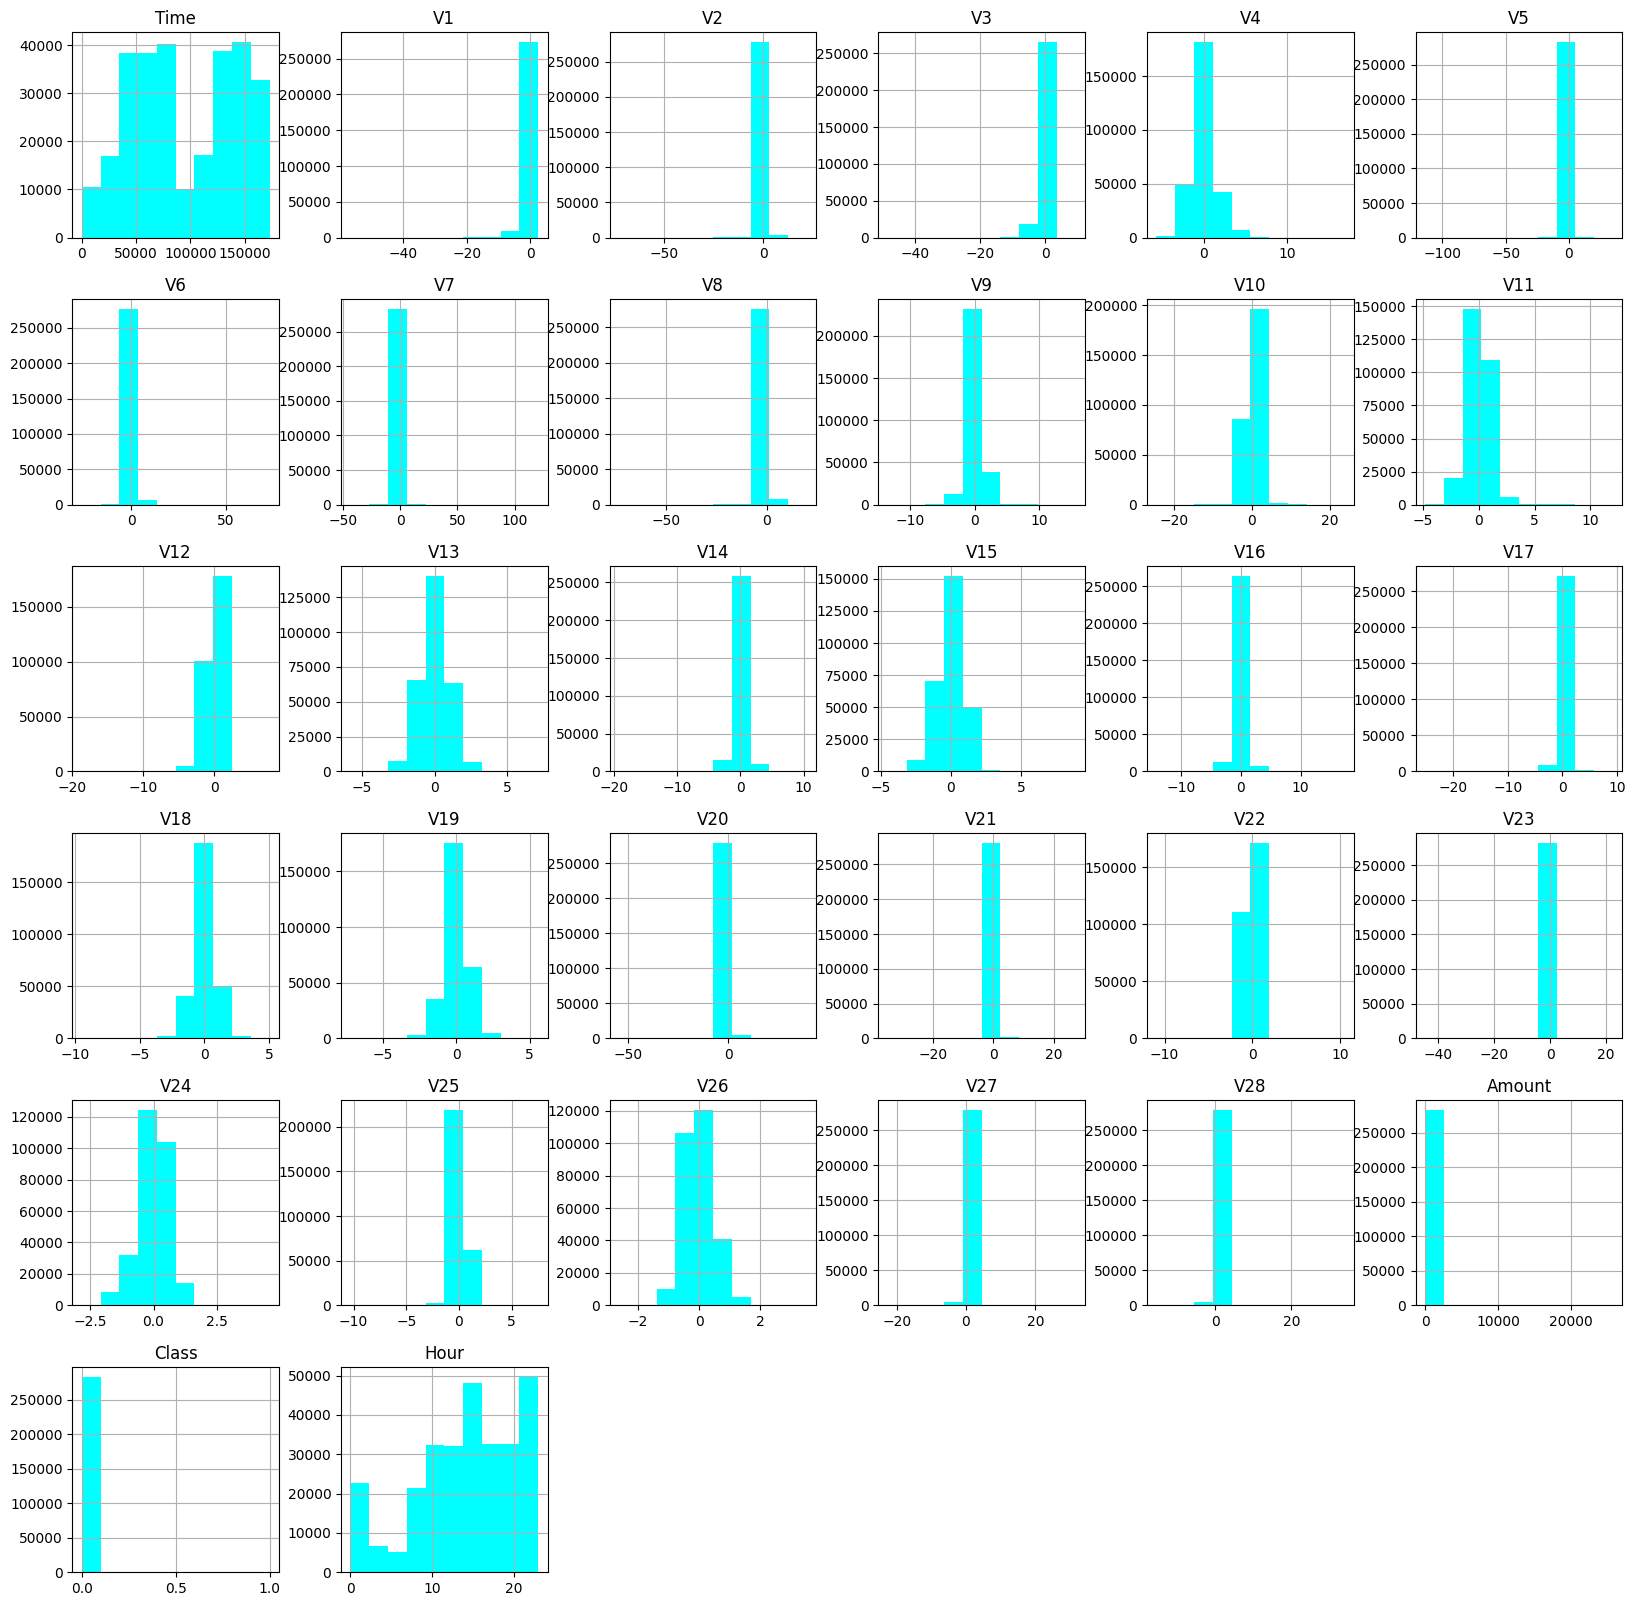

In [45]:
# Visualize histograms of numerical features
credit_card.hist(figsize=(20, 20), color='#00FFFF')  # Change the color to 'skyblue'

# Update plot properties for better visibility
plt.title('Histogram of Credit Card Data', fontsize=18)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

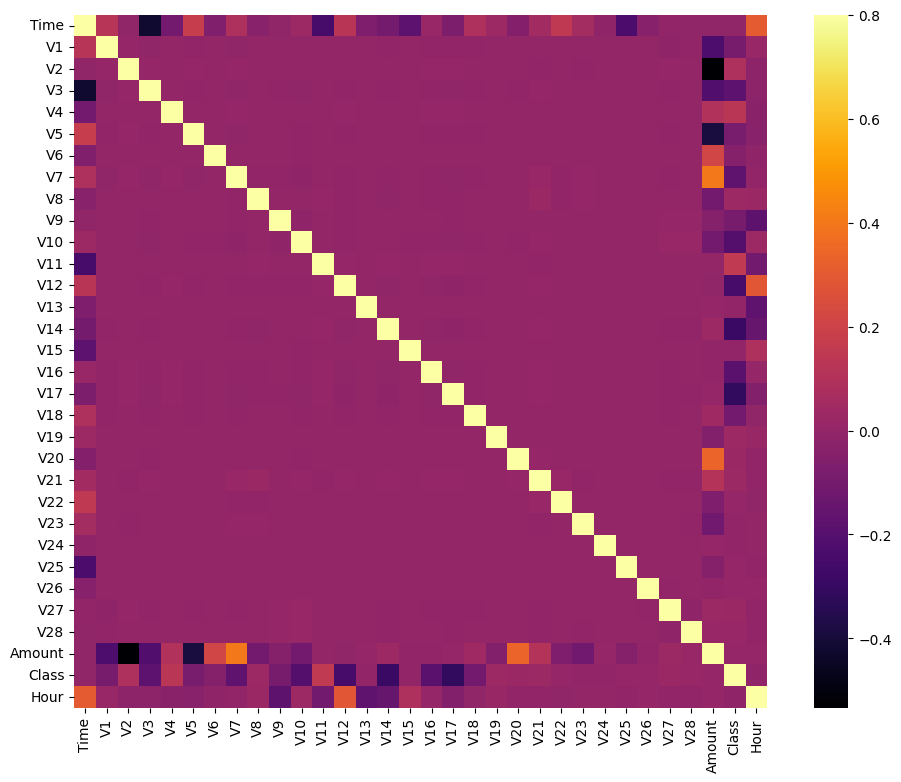

In [40]:
# Visualize correlation matrix as a heatmap
corr_matrix = credit_card.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True, cmap='inferno')  # Change the color scheme to 'coolwarm'
plt.show()

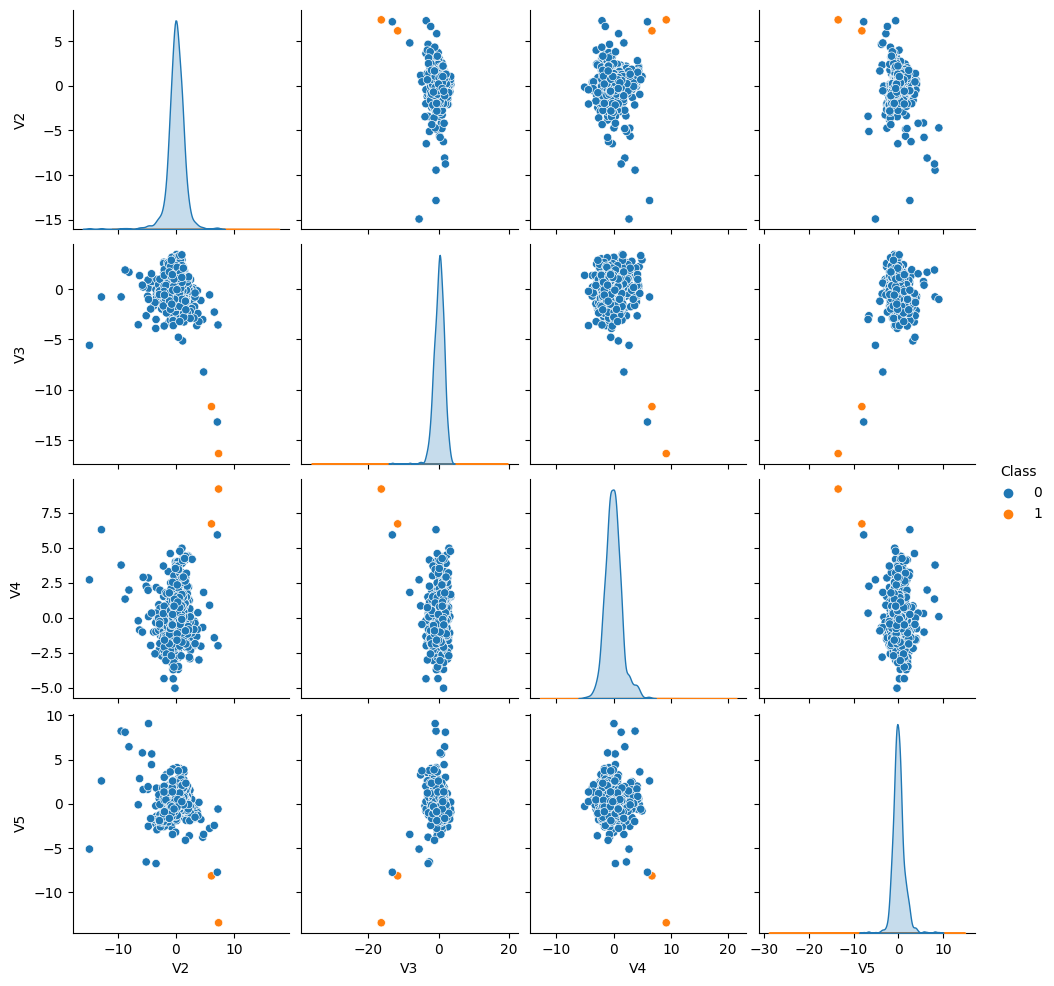

In [21]:
# Visualize pair plot of select features
subset_of_features = ['V2', 'V3', 'V4', 'V5', 'Class']  # Example subset
sns.pairplot(credit_card.sample(1000)[subset_of_features], hue='Class', diag_kind='kde')
plt.show()

In [22]:
sc = StandardScaler()
credit_card['std_Amount'] = sc.fit_transform(credit_card['Amount'].values.reshape (-1,1))

#removing Amount
credit_card = credit_card.drop(columns = ["Amount", "Time"], axis=1)

In [23]:
credit_card.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [26]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [27]:
# Split the dataset into train and test sets
X = credit_card.drop('Class', axis=1) # Features
y = credit_card['Class'] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_under, Y_under = undersample.fit_resample(X, y)

In [29]:
# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [30]:
# model building

In [31]:
# logistic regression building 

In [32]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)

In [33]:
# svc model building 
svc = SVC(kernel = 'linear',C = 0.1)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [35]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

Mean Cross-Validation Score: 0.98
The ROC AUC Score is: 0.77 



The classification report of Logistic Regressor is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.54      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746
 



The confusion matrix is below : 


<Axes: >

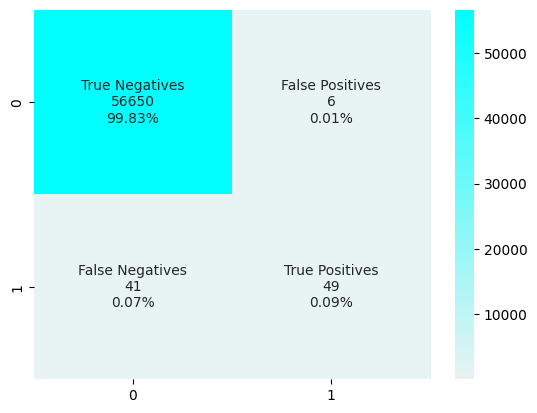

In [36]:
# logistic regression analysis
lg_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 2)
lg_scores = cross_val_score(lg, X_train, y_train, cv = lg_cv, scoring = 'roc_auc').mean()
print(f"Mean Cross-Validation Score: {lg_scores:.2f}")
#------------------------------------------------------------------------------

print(f"The ROC AUC Score is: {roc_auc_score(y_test, lg_pred):.2f}", '\n\n\n')
#------------------------------------------------------------------------------

lg_report = classification_report(y_test, lg_pred)
print('The classification report of Logistic Regressor is below : ', '\n\n\n', lg_report, '\n')
#------------------------------------------------------------------------------

fpr, tpr, _ = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#FF9933')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#00FFFF'))
pio.show(fig)
#------------------------------------------------------------------------------

print('The confusion matrix is below : ')
cm = confusion_matrix(y_test, lg_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
cmap = sns.light_palette("#00FFFF", as_cmap=True)
sns.heatmap(cm, annot = labels, cmap = cmap, fmt = '')

Mean Cross-Validation Score: 0.96
The ROC AUC Score is: 0.87 



The classification report of SVM is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.86      0.74      0.80        90

    accuracy                           1.00     56746
   macro avg       0.93      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746
 



The confusion matrix is below :  



<Axes: >

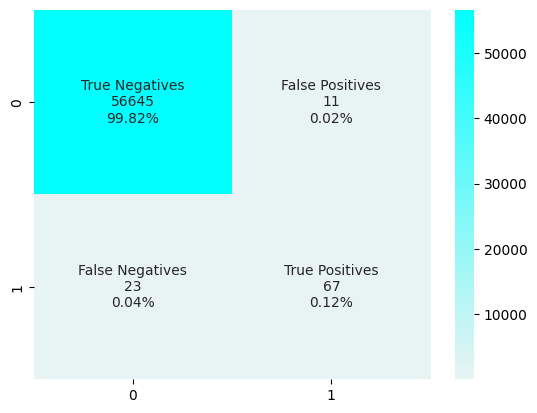

In [65]:
svc_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 2)
svc_scores = cross_val_score(svc, X_train, y_train, cv = svc_cv, scoring = 'roc_auc').mean()
print(f"Mean Cross-Validation Score: {svc_scores:.2f}")
#------------------------------------------------------------------------------

print(f"The ROC AUC Score is: {roc_auc_score(y_test, svc_pred):.2f}", '\n\n\n')
#------------------------------------------------------------------------------

svc_report = classification_report(y_test, svc_pred)
print('The classification report of SVM is below : ', '\n\n\n', svc_report, '\n')
#------------------------------------------------------------------------------

fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
roc_auc = auc(fpr, tpr)
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#FF9933')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#00FFFF'))
pio.show(fig)
#------------------------------------------------------------------------------

print('The confusion matrix is below : ', '\n')
cm = confusion_matrix(y_test, svc_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
cmap = sns.light_palette("#00FFFF", as_cmap=True)
sns.heatmap(cm, annot = labels, cmap = cmap, fmt = '')

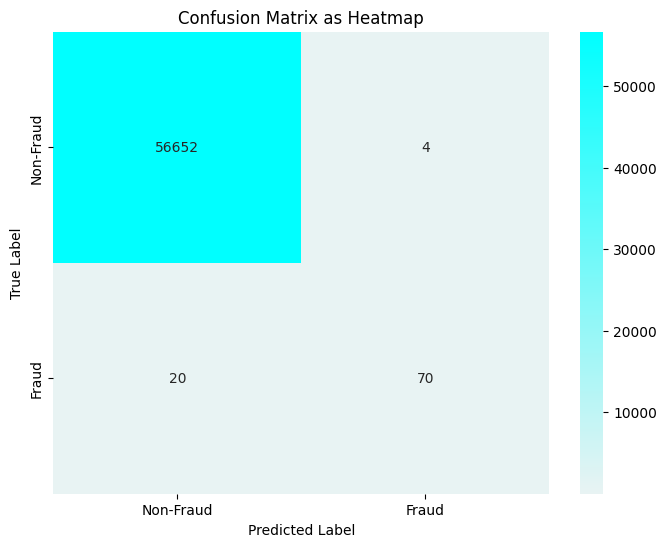


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.78      0.85        90

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [71]:
# Random Forest Evaluation
# Plotting the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.cmap = sns.light_palette("#00FFFF", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix as Heatmap')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [64]:
print(f"The ROC AUC Score is: {roc_auc_score(y_test, y_pred):.2f}", '\n\n\n')
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#FF9933')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#00FFFF'))
pio.show(fig)


The ROC AUC Score is: 0.89 





In [39]:
# Perform k-fold cross-validation
# Using 5 folds is common, but you can choose a different number if you wish
cv_scores = cross_val_score(rf_classifier, X_train_res, y_train_res, cv=5, scoring='f1_macro')

# Output the results
print(f'Cross-validated F1 scores for each fold: {cv_scores}')
print(f'Average cross-validated F1 score: {cv_scores.mean()}')

Cross-validated F1 scores for each fold: [0.99985657 0.9999338  0.99987864 0.99991174 0.99987864]
Average cross-validated F1 score: 0.9998918785026693


In [40]:
# k-folds for Logistic regression
cv_scores = cross_val_score(lg, X_train, y_train, cv=5, scoring='f1_macro')

# Output the results
print(f'Cross-validated F1 scores for each fold: {cv_scores}')
print(f'Average cross-validated F1 score: {cv_scores.mean()}')

Cross-validated F1 scores for each fold: [0.85694433 0.8092591  0.87390768 0.87294681 0.87575785]
Average cross-validated F1 score: 0.8577631525920651


In [42]:
# k-folds for svc 
cv_scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_macro')

# Output the results
print(f'Cross-validated F1 scores for each fold: {cv_scores}')
print(f'Average cross-validated F1 score: {cv_scores.mean()}')

Cross-validated F1 scores for each fold: [0.91081549 0.86965341 0.91757808 0.91536058 0.8985218 ]
Average cross-validated F1 score: 0.9023858727966685


In [51]:


# Create subsets based on the 'Class' column
subset1 = credit_card.loc[credit_card['Class'] == 0, 'std_Amount']
subset2 = credit_card.loc[credit_card['Class'] == 1, 'std_Amount']

# Perform an independent two-sample t-test
t_statistic, p_value = ttest_ind(subset1, subset2)

# Display the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check for statistical significance at a significance level of 0.05
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

T-Statistic: -3.0772241383947843
P-Value: 0.0020895802939985045
The difference is statistically significant.


In [53]:
# logistic regression accuracy
accuracy = accuracy_score(y_test, lg_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.92%


In [54]:
# SVC accuracy 
accuracy = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.94%


In [55]:
# random forest algoeithm accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.96%


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step


<Axes: >

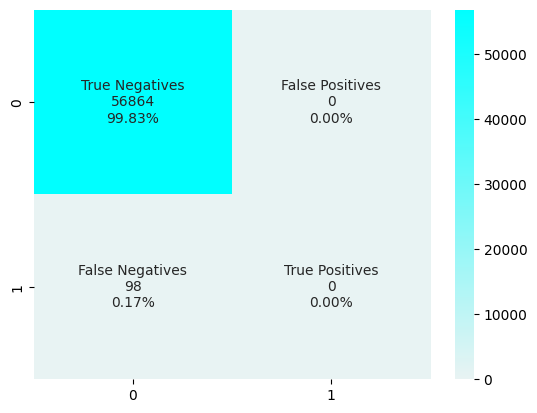

In [6]:
# Neural Network 
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
cmap = sns.light_palette("#00FFFF", as_cmap=True)
sns.heatmap(cm, annot = labels, cmap = cmap, fmt = '')






Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9982 - loss: 0.0231
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9983 - loss: 0.0128
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9982 - loss: 0.0174
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9982 - loss: 0.0153
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9982 - loss: 0.0136
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9982 - loss: 0.0153
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9982 - loss: 0.0237
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9984 - loss: 0.0131
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9981 - loss: 0.0219
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9983 - loss: 0.0127
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step


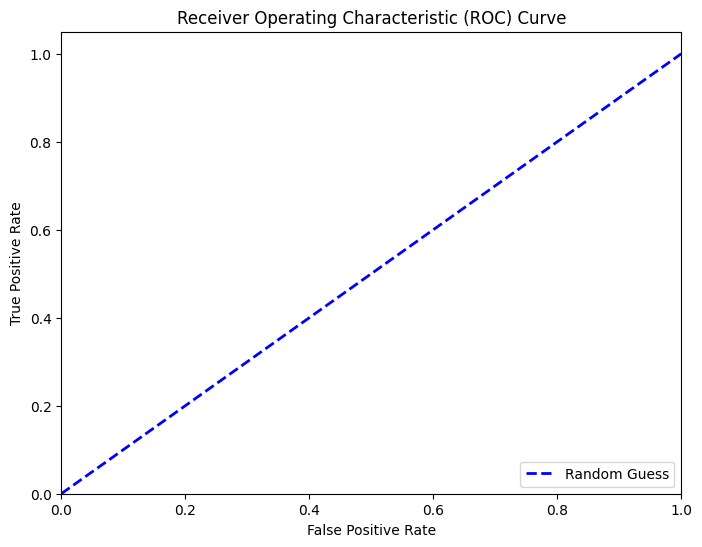

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your model first
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on test data
y_pred_proba = model.predict(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




In [78]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on test data
_, accuracy = model.evaluate(X_test, y_test)




Epoch 1/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9958 - loss: 10.4097
Epoch 2/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9959 - loss: 5.8953
Epoch 3/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9966 - loss: 1.3518
Epoch 4/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9986 - loss: 0.0424
Epoch 5/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9982 - loss: 0.0263
Epoch 6/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9985 - loss: 0.0133
Epoch 7/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9983 - loss: 0.0142
Epoch 8/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9984 - loss: 0.0154
Epoch 9/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9984 - loss: 0.0179
Epoch 10/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9983 - loss: 0.0181
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.9984 - loss: 0.0120


In [58]:
# Perform k-fold cross-validation
# Initialize the neural network classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(mlp_classifier, X_train, y_train ,cv=skf, scoring='f1_macro')

# Output the results
print(f'Cross-validated F1 scores for each fold: {cv_scores}')
print(f'Average cross-validated F1 score: {cv_scores.mean()}')

Cross-validated F1 scores for each fold: [0.78251103 0.49957559 0.82449228 0.49957559 0.55983858]
Average cross-validated F1 score: 0.6331986152537065


In [12]:
# KNN model 

# Separate features (X) and target variable (y)
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[56654     2]
 [   25    65]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746


Accuracy Score: 0.9995241955380115


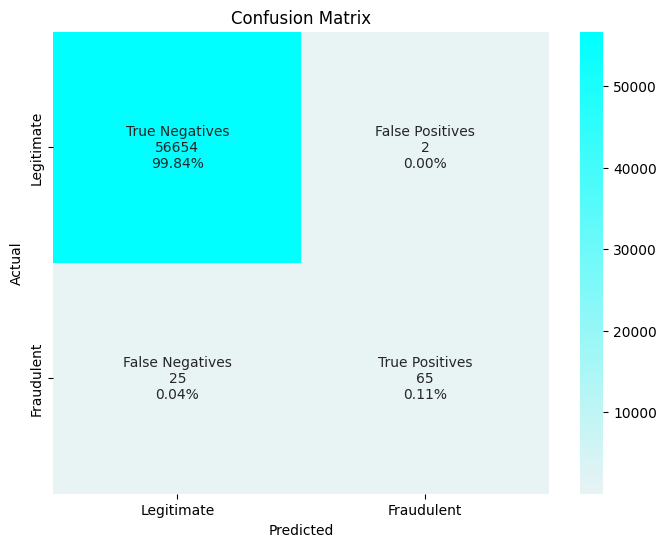

In [13]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot confusion matrix
cmap = sns.light_palette("#00FFFF", as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, cmap=cmap, fmt='', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [14]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]  # Probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC AUC curve
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#FF9933')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#00FFFF'))
pio.show(fig)


In [15]:
k_folds = 5

# Perform k-fold cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=k_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99949335 0.99933915 0.99960349 0.99955943 0.99940523]
Mean CV Score: 0.9994801304079655


In [ ]:
#decision tree 

X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[56624    32]
 [   26    64]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.67      0.71      0.69        90

    accuracy                           1.00     56746
   macro avg       0.83      0.86      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Accuracy Score: 0.9989779015260988


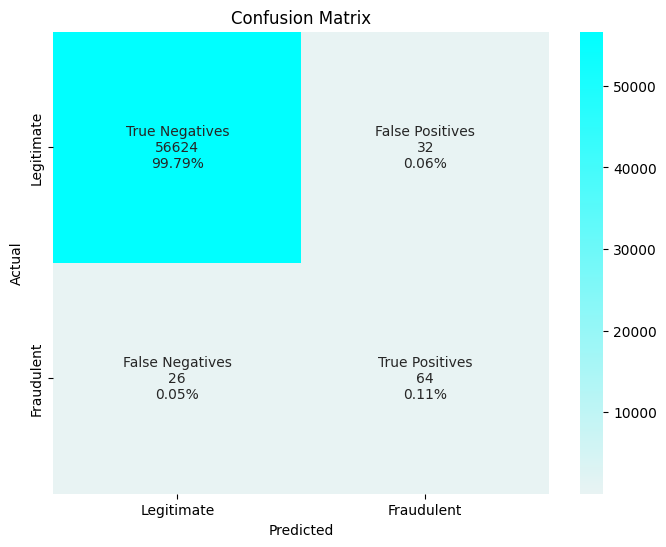

In [48]:
#confusion matrix 

y_pred = clf.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot confusion matrix
cmap = sns.light_palette("#00FFFF", as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, cmap=cmap, fmt='', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [49]:
#roc AUC curve
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC AUC curve
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#FF9933')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#00FFFF'))
pio.show(fig)

In [72]:
#k fold 

dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=skf, scoring='f1_macro')

# Output the results
print(f'Cross-validated F1 scores for each fold: {cv_scores}')
print(f'Average cross-validated F1 score: {cv_scores.mean()}')

Cross-validated F1 scores for each fold: [0.82403749 0.86751576 0.8779955  0.88488904 0.870843  ]
Average cross-validated F1 score: 0.8650561567337072


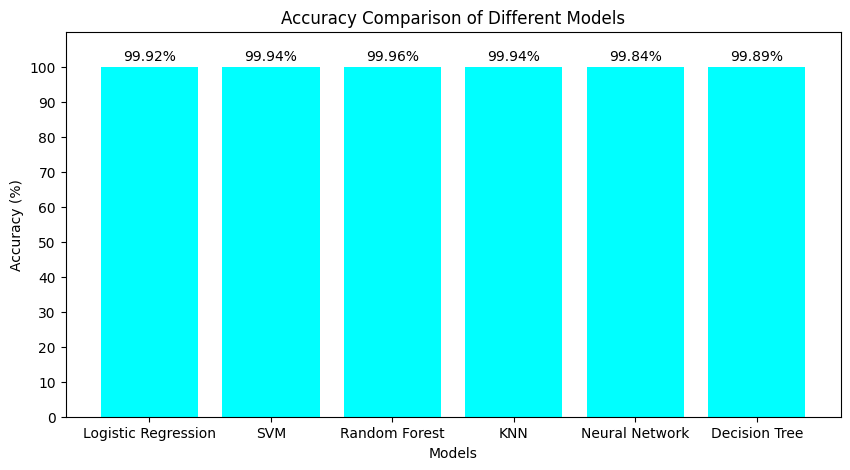

In [86]:
model_names = ['Logistic Regression', 'SVM', 'Random Forest','KNN' , 'Neural Network' , 'Decision Tree']
accuracy_scores = [99.92, 99.94, 99.96,99.94,99.84,99.89]

# Create a bar plot
plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, accuracy_scores, color='#00FFFF')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')

# Set y-axis ticks as percentages
plt.ylim(0, 110)
plt.yticks(range(0, 101, 10))

# Add the percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', va='bottom')

plt.show()

In [17]:


# Separate fraudulent and legitimate transactions
fraudulent_transactions = credit_card[credit_card['Class'] == 1]['Amount']
legitimate_transactions = credit_card[credit_card['Class'] == 0]['Amount']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(fraudulent_transactions, legitimate_transactions)

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in transaction amounts between fraudulent and legitimate transactions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in transaction amounts between fraudulent and legitimate transactions.")

T-Statistic: 3.077224138394785
P-Value: 0.0020895802939984963
Reject the null hypothesis: There is a significant difference in transaction amounts between fraudulent and legitimate transactions.
